# Decision Tree Code : Classification Algorithm

# Business Problem Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [2]:
df=pd.read_csv("penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# EDA

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [6]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [7]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [8]:
df=df[df['sex']!='.']
df.shape

(344, 7)

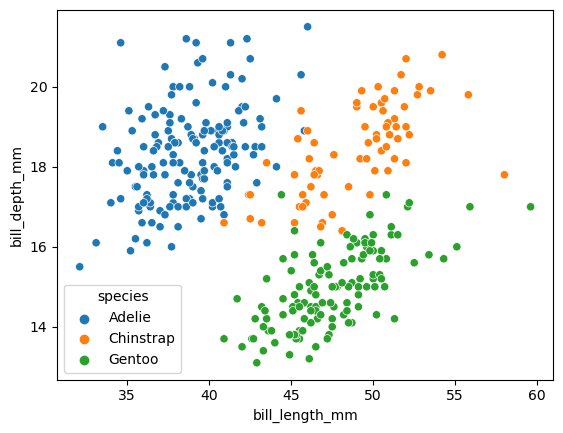

In [9]:
sns.scatterplot(x='bill_length_mm',y='bill_depth_mm',data=df,hue='species')
plt.show()

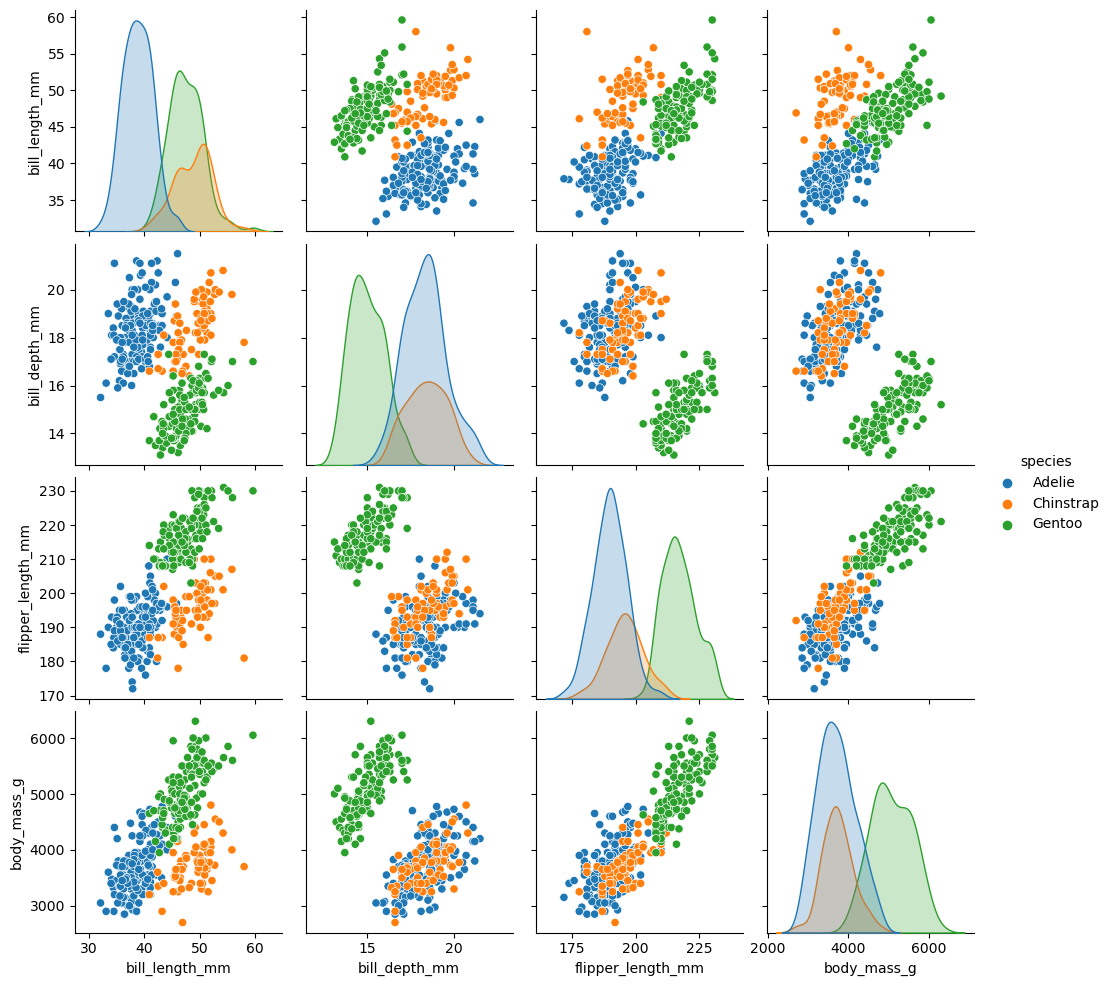

In [10]:
sns.pairplot(df,hue='species')
plt.show()

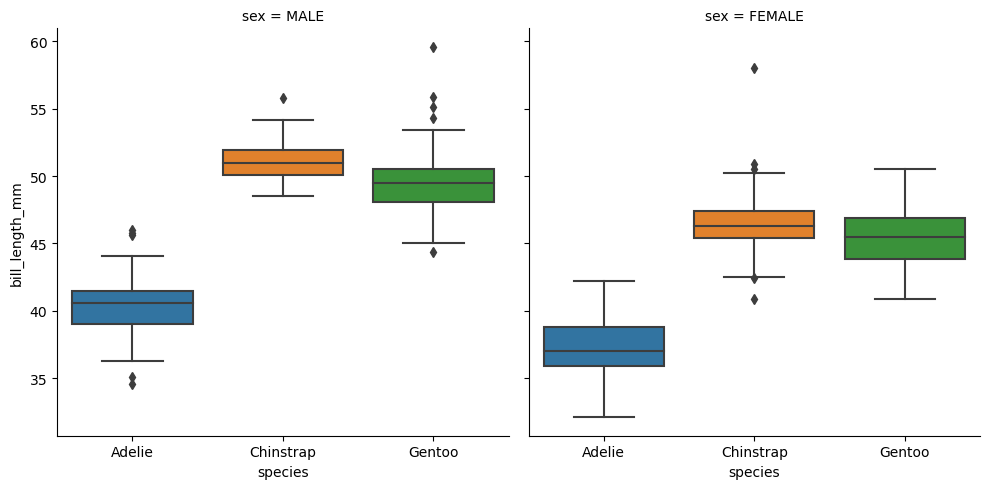

In [11]:
sns.catplot(x='species',y='bill_length_mm',data=df,kind='box',col='sex')
plt.show()

# Feature Engineering

In [12]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [13]:
df=df.dropna()
df.shape

(333, 7)

# Encoding

In [14]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [15]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

# Train/Test Split

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=101)

# Modelling

#Decision Tree Classifier-with default Hyperparameters

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
model=DecisionTreeClassifier()

In [19]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

#Prediction

In [20]:
base_pred=model.predict(X_test)

In [21]:
pred_train=model.predict(X_train)

# Evaluation

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix


In [23]:
accuracy_score(y_train,pred_train)

1.0

In [24]:
accuracy_score(y_test,base_pred)

0.96

C:\Users\vasan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


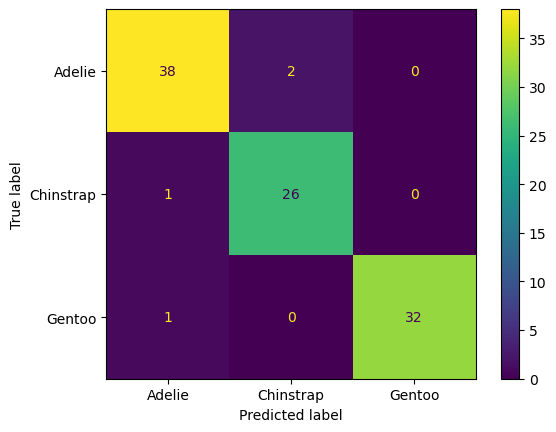

In [27]:
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [29]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#ConfusionMatrixDisplay(model,X_test,y_test)
#plt.show()

In [28]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [30]:
model.feature_importances_

array([0.33350103, 0.02010577, 0.57575804, 0.        , 0.04491847,
       0.        , 0.02571668])

In [31]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['FeatureImportance'])

,FeatureImportance
bill_length_mm,0.333501
bill_depth_mm,0.020106
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.044918
island_Torgersen,0.000000
sex_MALE,0.025717


# Visualize the Tree

In [32]:
from sklearn.tree import plot_tree

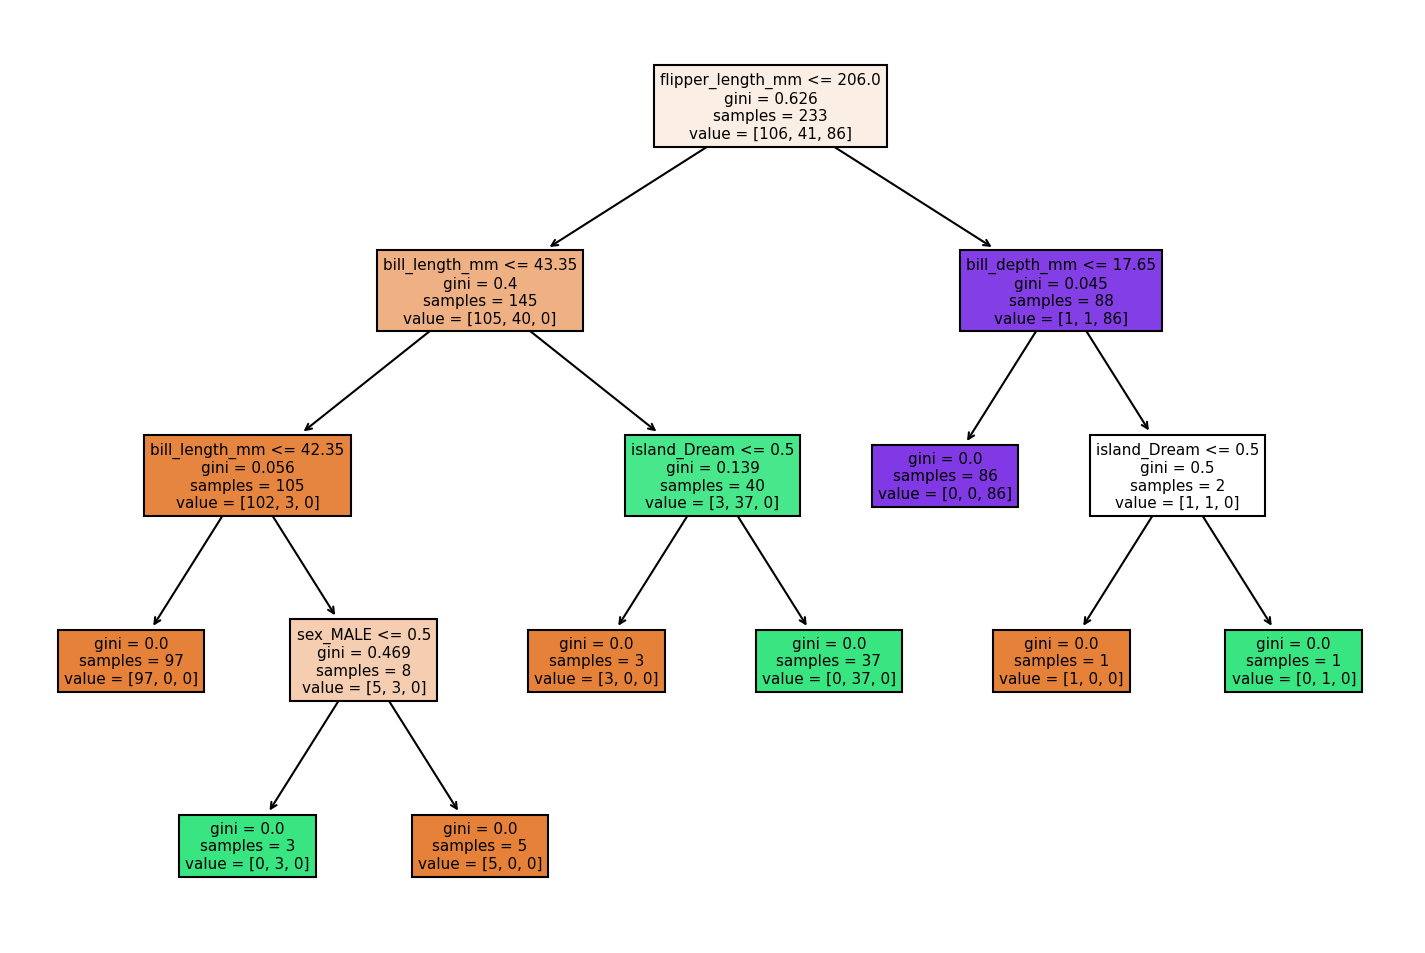

In [33]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()

# Optimization--Pruning of Decision Tree

# Max Depth

In [38]:
pruned_tree=DecisionTreeClassifier(max_depth=2)

In [37]:
def report_model(model):
    model.fit(X_train,y_train)
    model_preds=model.predict(X_test)
    pred_train=model.predict(X_train)
    print("Train Accuracy:",accuracy_score(y_train,pred_train)) #Train Accuracy
    print("Test Accuracy:",accuracy_score(y_test,model_preds)) #Train Accuracy
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)
    

Train Accuracy: 0.9699570815450643
Test Accuracy: 0.92


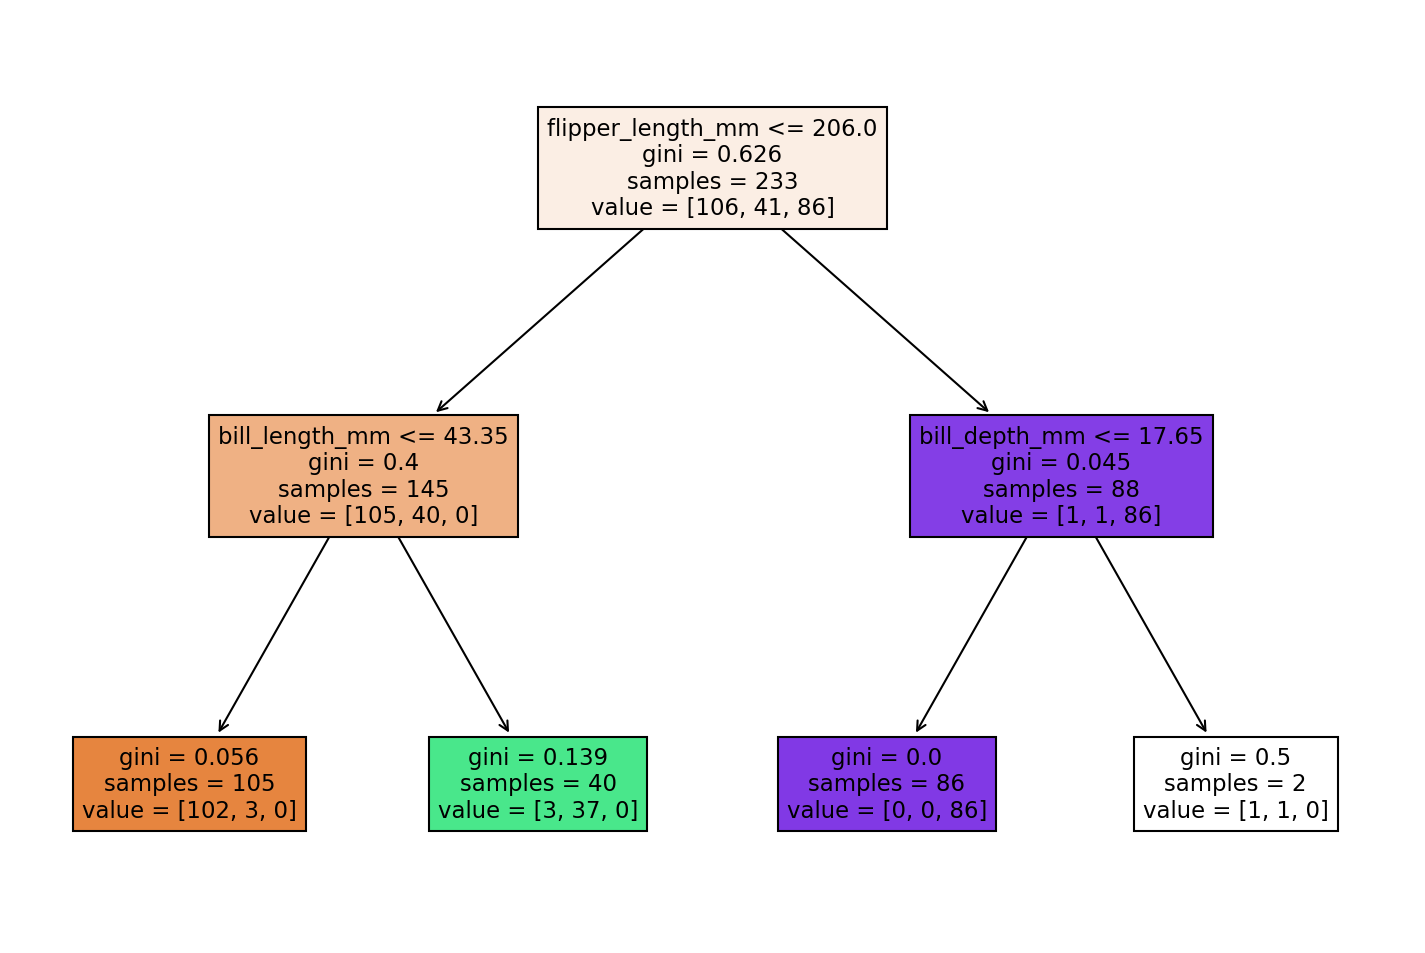

In [39]:
report_model(pruned_tree)

# Max Leaf Nodes

In [41]:
pruned_tree=DecisionTreeClassifier(max_leaf_nodes=3)

Train Accuracy: 0.9699570815450643
Test Accuracy: 0.92


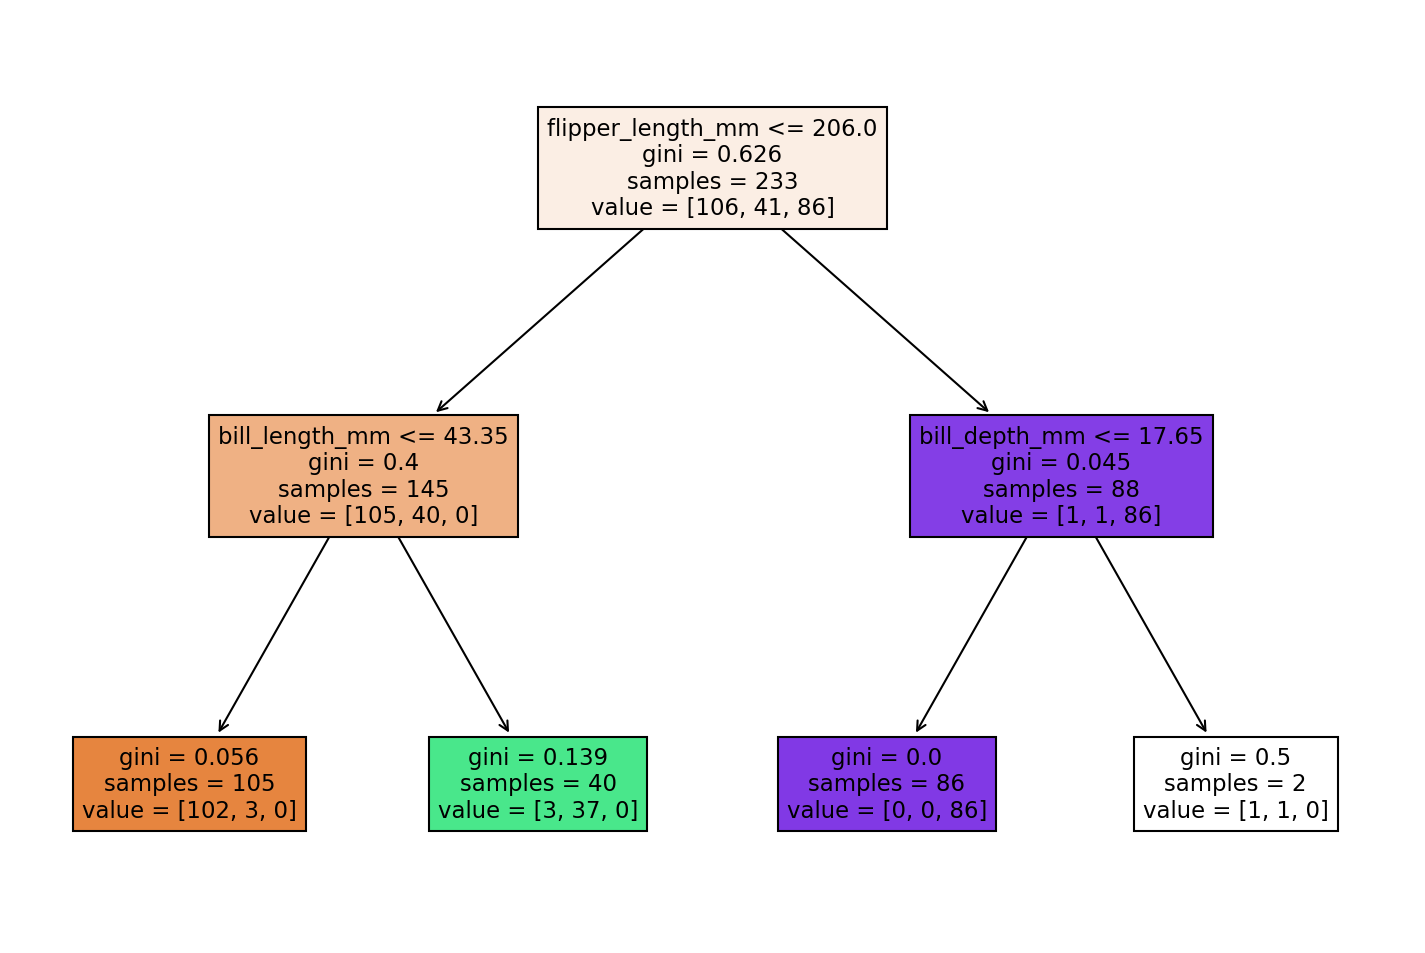

In [40]:
report_model(pruned_tree)